# Sprint 2 Project - Thomas Kulch

### In this project, I will be importing and working with data from Instacart in 2017. I will be cleaning up the data, and answering questions about it to give insights on the shopping habits of Instacart customers.

My goals for this project will be to improve on pandas and matplotlib concepts and work on writing comments and being clear and concise with my research

In [1]:
#library imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Read in each file and call info() on each

In [2]:
#order_products file. this is a larger file so need to call show_counts to get column counts
op = pd.read_csv('/datasets/order_products.csv',sep=';')

op.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [3]:
#instacart_orders file
od = pd.read_csv('/datasets/instacart_orders.csv',sep=';')

od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
#products file
pt = pd.read_csv('/datasets/products.csv',sep=';')

pt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
#aisles file
ai = pd.read_csv('/datasets/aisles.csv',sep=';')

ai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
#departments file
dpt = pd.read_csv('/datasets/departments.csv',sep=';')

dpt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
print(od['order_id'].duplicated().sum())
print()
print(od['order_id'].value_counts().head(20))
print()
display(od.value_counts().head(15))
#There can't be implicit duplicates because these are all int/float data types

15

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
2232988    2
408114     2
2282673    2
1919531    2
2160484    2
1918001    2
794638     2
1112182    2
467134     2
2845099    2
2357032    1
2175960    1
1251124    1
3352370    1
249647     1
Name: order_id, dtype: int64



order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
1918001   188546   14            3          2                  16.0                      2
1286742   183220   48            3          2                  4.0                       2
1112182   202304   84            3          2                  6.0                       2
2845099   31189    11            3          2                  7.0                       2
1919531   191501   32            3          2                  7.0                       2
2125

In [8]:
# Check for all orders placed Wednesday at 2:00 AM
#Based on my value_counts check in the previous cell, I can see order_dow == 3 and order_hour_of_day == 2 contains all of the duplicates
od_wed = od.loc[(od['order_dow']==3) & (od['order_hour_of_day']==2)]

#checking the first 20 records of the Wednesday at 2am orders to confirm there are duplicates.
od_wed.sort_values(by='order_id').head(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
316583,272079,121263,7,3,2,3.0
210068,284770,137352,7,3,2,8.0
359625,332561,201301,1,3,2,NaN
195093,350018,142887,6,3,2,1.0
29129,353088,46038,4,3,2,11.0


In [9]:
#checking for all duplicate rows using duplicated()
duplicates = od.duplicated(keep=False)
duplicate_rows = od[duplicates]
print(duplicate_rows.sort_values(by='order_id'))

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
242618   1021560    53767             3          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
314427   1286742   183220            48          3 

In [10]:
# Remove duplicate orders
od = od.drop_duplicates().reset_index(drop=True)

In [11]:
# Double check for duplicate rows
od.duplicated().sum()

0

In [12]:
# Double check for duplicate order IDs only
print(od['order_id'].duplicated().sum())

#the duplicates in this dataframe have been removed

0


### `products` data frame

In [13]:
# Check for fully duplicate rows
print(pt.duplicated().sum())

0


In [14]:
# Check for just duplicate product IDs
print(pt['product_id'].duplicated().sum())

0


In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
pt['product_names_lower'] = pt['product_name'].str.lower()
pt['product_names_lower'].value_counts()
#we can see here that there are implicit duplicates

green tea with ginseng and honey                           3
fruit cocktail in heavy syrup                              2
albacore solid white tuna in water                         2
apricot energy bar                                         2
matzo ball mix                                             2
                                                          ..
natures's dairy-free creamer french vanilla unsweetened    1
daily turmeric nutrient booster powder                     1
organic italian seasoning                                  1
orange chocolate beet smart cookies                        1
crinkle cut french fried potatoes                          1
Name: product_names_lower, Length: 48332, dtype: int64

In [16]:
# Check for duplicate product names that aren't missing
pt_copy = pt.copy()

pt_copy = pt_copy.dropna(subset=['product_name'])

pt_copy['product_names_lower'].value_counts()
#same result as above

green tea with ginseng and honey                           3
fruit cocktail in heavy syrup                              2
albacore solid white tuna in water                         2
apricot energy bar                                         2
matzo ball mix                                             2
                                                          ..
natures's dairy-free creamer french vanilla unsweetened    1
daily turmeric nutrient booster powder                     1
organic italian seasoning                                  1
orange chocolate beet smart cookies                        1
crinkle cut french fried potatoes                          1
Name: product_names_lower, Length: 48332, dtype: int64

### `departments` data frame

In [17]:
#Checking for dupes in all of departments
print(dpt.duplicated().sum())

0


In [18]:
#Checking for dupes in the department name column as well as implicit dupes
print(dpt['department'].duplicated().sum())
print()
dpt['department_lower'] = dpt['department'].str.lower()
dpt['department_lower'].value_counts()
#there are no duplicates of any kind in departments

0



beverages          1
breakfast          1
bulk               1
snacks             1
alcohol            1
pets               1
other              1
produce            1
babies             1
international      1
dry goods pasta    1
bakery             1
meat seafood       1
deli               1
canned goods       1
personal care      1
household          1
dairy eggs         1
pantry             1
missing            1
frozen             1
Name: department_lower, dtype: int64

### `aisles` data frame

In [19]:
#Checking for dupes in all of aisles
print(ai.duplicated().sum())

0


In [20]:
#Checking for dupes in the aisle name column as well as implicit dupes
print(ai['aisle'].duplicated().sum())
print()
ai['aisle_lower'] = ai['aisle'].str.lower()
ai['aisle_lower'].value_counts()
#there are no duplicates of any kind in aisles

0



spreads                   1
fresh dips tapenades      1
oils vinegars             1
tofu meat alternatives    1
energy sports drinks      1
                         ..
breakfast bakery          1
fruit vegetable snacks    1
honeys syrups nectars     1
soap                      1
indian foods              1
Name: aisle_lower, Length: 134, dtype: int64

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
print(op.duplicated().sum())

0


In [22]:
# Double check for any other tricky duplicates
print(op['order_id'].duplicated().sum()) #this is fine because this does not house the entire order. there are multiple rows for each order
print(op['product_id'].duplicated().sum()) #this is fine because people can order the same products twice


op_tricky = op.duplicated(subset=['order_id','product_id']).sum()

print(op_tricky) #looks like there are no duplicates in this dataframe

4094961
4499434
0


## Find and remove missing values


### `products` data frame

In [23]:
#Identify count of missing values
print(pt.isna().sum())

product_id                0
product_name           1258
aisle_id                  0
department_id             0
product_names_lower    1258
dtype: int64


In [24]:
# Are all of the missing product names associated with aisle ID 100?
print(pt[pt['aisle_id'].isin([100])]['product_name'].isna().sum())
#all of the missing product_names fall under aisle 100

1258


In [25]:
# Are all of the missing product names associated with department ID 21?
print(pt[pt['department_id'].isin([21])]['product_name'].isna().sum())
#all of the missing product_names also fall under department 21

1258


In [26]:
# What is this ailse and department?
pt.loc[(pt['aisle_id']==100) & (pt['department_id']==21)]

#there is no way to tell what they are because there's no value attached to them and they only appear together. 
#this is an unknown combination.

,product_id,product_name,aisle_id,department_id,product_names_lower
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


In [27]:
# Fill missing product names with 'Unknown'
#we can comfortably call fillna() on the whole dataframe because we know where all of the missing values are
pt = pt.fillna(value='Unknown')
#checking to see if it worked and the product names for aisle 100 and dpt 21 are filled with unknown
pt.loc[(pt['aisle_id']==100) & (pt['department_id']==21)]

,product_id,product_name,aisle_id,department_id,product_names_lower
37,38,Unknown,100,21,Unknown
71,72,Unknown,100,21,Unknown
109,110,Unknown,100,21,Unknown
296,297,Unknown,100,21,Unknown
416,417,Unknown,100,21,Unknown
...,...,...,...,...,...
49552,49553,Unknown,100,21,Unknown
49574,49575,Unknown,100,21,Unknown
49640,49641,Unknown,100,21,Unknown
49663,49664,Unknown,100,21,Unknown


### `orders` data frame

In [28]:
#Identify count of missing values
print(od.isna().sum())
#days_since_prior_order    28817 missing

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# Are there any missing values where it's not a customer's first order?
od.loc[(od['order_number'] > 1) & (od['days_since_prior_order'].isna())]
#there is no instance where a user has more than one order and a missing value for days_since_prior_order. so its ok to have missing values

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `order_products` data frame

In [30]:
#Identify count of missing values
print(op.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# What are the min and max values in this column?
print(op['add_to_cart_order'].min()) #1.0
print()
print(op['add_to_cart_order'].max()) #64.0

1.0

64.0


In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
#save the missing values of add_to_cart_order to a new variable
orders_with_missing_values = op[op['add_to_cart_order'].isna()]

#group the new dataframe by order_id and call size() to get the count of missing values per order id
missing_values_count = orders_with_missing_values.groupby('order_id').size().reset_index(name='missing_values_count')

#print random rows to see it worked
print(missing_values_count.sample(10))
print()
#check to make sure it worked and we have all the unique order ids with missing add_to_cart_order values
print(missing_values_count.duplicated().sum())

    order_id  missing_values_count
4     165801                     6
14    813364                    21
48   2094761                     9
13    747668                     1
69   3383594                     5
40   1730767                    31
9     388234                     6
64   2997021                     4
53   2449164                    12
58   2652650                     1

0


In [33]:
# Do all orders with missing values have more than 64 products?
#create a new dataframe containing records with order_id's in the missing_values_count series
new_op = op[op['order_id'].isin(missing_values_count['order_id'])]

#create a boolean series that returns true if the count of products attached to an order id is greater than 64
count = new_op.groupby('order_id')['product_id'].count() > 64

#print the value counts to see than all of them have more than 64 products.
count.value_counts()


True    70
Name: product_id, dtype: int64

In [34]:
# Replace missing values with 999 and convert column to integer type
op['add_to_cart_order'] = op['add_to_cart_order'].fillna(value=999).astype(int)

#double check that missing values are filled
print(op.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
#check the value counts of each of these columns to make sure there aren't any obscure values.
order_counts_by_day = od['order_dow'].value_counts().sort_index()

print(order_counts_by_day)

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64


In [36]:
order_counts_by_hour = od['order_hour_of_day'].value_counts().sort_index()

print(order_counts_by_hour)
#both columns look good

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64


### [A2] What time of day do people shop for groceries?

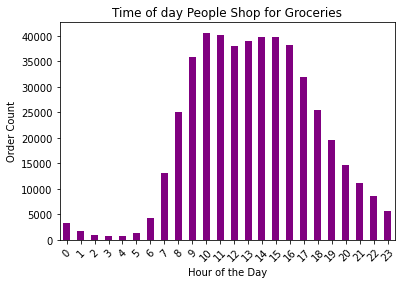

In [37]:
#plotting on a bar chart to see the distribution
order_counts_by_hour.plot(title='Time of day People Shop for Groceries',
        kind='bar',
        xlabel='Hour of the Day',
        ylabel='Order Count',
        color='purple',
        rot=45
)

plt.show()

According to the Bar Graph, People tend to grocery shop the most in the late morning and mid afternoon, but the vast majority do it during 9-5 working hours.

### [A3] What day of the week do people shop for groceries?

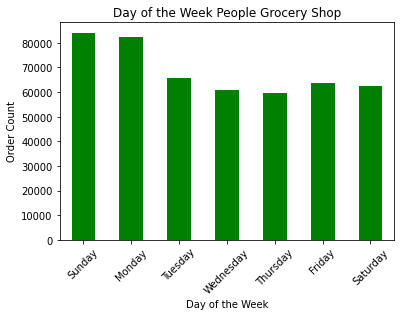

In [38]:
#change indexes in order_counts_by_day to show days of week instead of number. easier to read
indexes=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

order_counts_by_day.index = indexes

#plotting on a bar chart to see the distribution
order_counts_by_day.plot(title='Day of the Week People Grocery Shop',
                         xlabel='Day of the Week',
                         ylabel='Order Count',
                         rot=45,
                         kind='bar',
                         color='green'
)

plt.show()

Based on the Bar Graph, people mostly do their grocery shopping on Sundays and Mondays.

### [A4] How long do people wait until placing another order?

In [39]:
#changing index format to look cleaner on a graph
days_until_count = od['days_since_prior_order'].value_counts().sort_index()

days_until_count.index = days_until_count.index.astype('int')

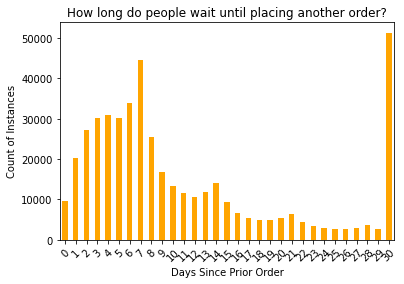

In [40]:
#plot a bar chart of the counts of days since last order
days_until_count.plot(kind='bar',
                      xlabel='Days Since Prior Order',
                      ylabel='Count of Instances',
                      color='orange',
                      title='How long do people wait until placing another order?',
                      rot=45
)

plt.show()

Based on the graph,30 days is an outlier and likely represents 30 or more days since last order. If we exclude those stats, people generally take about a week to order again or wait a long time to use the service again.

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [41]:
#create a dataframe for all orders on wednesdays
od_wed = od.loc[(od['order_dow']==3)]

od_wed['order_hour_of_day'].value_counts().sort_index()

0      373
1      215
2      106
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [42]:
#create a dataframe for all orders on saturdays
od_sat = od.loc[(od['order_dow']==6)]

od_sat['order_hour_of_day'].value_counts().sort_index()

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

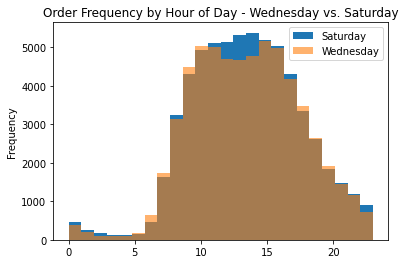

In [43]:
#plot both dataframes indexing hour of the day onto the same histogram to compare the results
od_sat['order_hour_of_day'].plot(kind='hist',
                                 bins=24,
                                 title='Order Frequency by Hour of Day - Wednesday vs. Saturday',
                                 ylabel='Frequency',
                                alpha=1)

od_wed['order_hour_of_day'].plot(kind='hist',
                                 bins=24,
                                alpha=.6)

plt.legend(['Saturday','Wednesday'])
plt.show()

Based on the histogram, the distributions for both Wednesday and Saturday are virtually the same, except people seem to grocery shop more on Saturdays in the middle of the day.

### [B2] What's the distribution for the number of orders per customer?

In [44]:
#group by the user id's and get their max order number so we have one entry for each user that accurately shows how many
#orders they've placed with instacart.

od_user_orders = od.groupby('user_id')['order_number'].max().reset_index(name='orders')

print(od_user_orders.sample(10))
od_user_orders['orders'].value_counts().head(30)

        user_id  orders
115631   151618      47
22181     29110      43
80769    105762      11
947        1241       9
99074    129889      15
135941   178168      16
116152   152290       8
149185   195400       7
102469   134336      32
1828       2372       5


4     12368
3     10510
5     10406
6      9194
2      9113
7      7901
1      7840
8      6894
9      6118
10     5497
11     4903
12     4411
13     4105
14     3792
15     3402
16     3017
17     2760
18     2616
19     2396
20     2223
21     2020
22     1887
23     1875
24     1655
25     1597
26     1450
27     1332
29     1241
28     1232
30     1183
Name: orders, dtype: int64

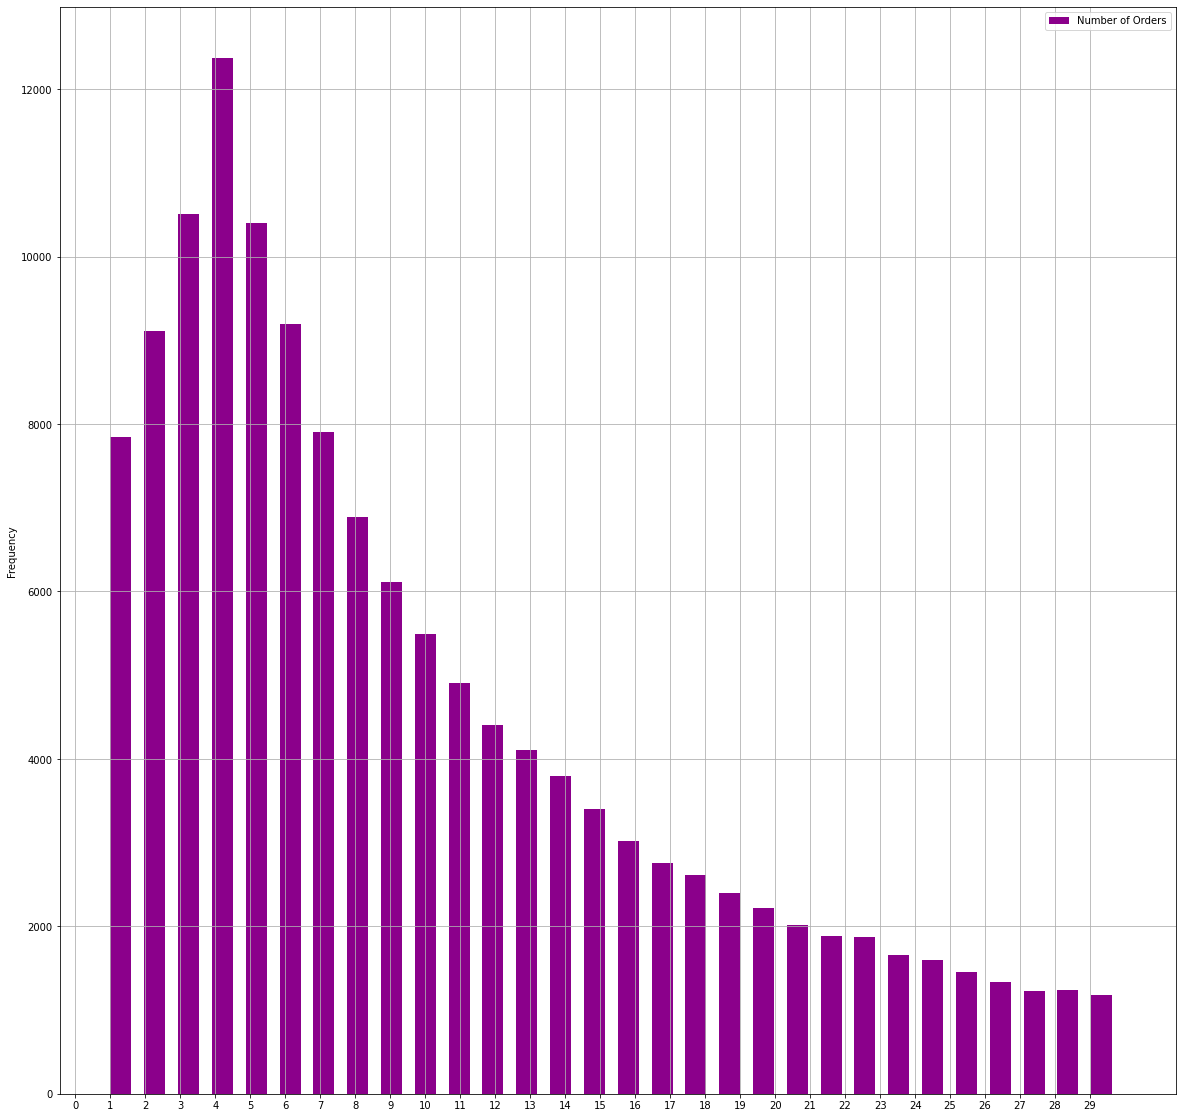

In [45]:
#create a scatterplot to show distribution of order counts by customer. after 30 orders, the graph doesn't tell much 
#other than not many people order more than 30 times, so I shrunk the range to capture the distribution of 1-10 orders more.
od_user_orders.plot(kind='hist',
                   y='orders',
                    range=[1,30],
                    ylabel='Frequency',
                    bins=30,
                   figsize=[20,20],
                   color='darkmagenta',
                   grid=True,
                   width=0.6)

plt.xticks(np.arange(0, 30, 1))
plt.legend(['Number of Orders'])
plt.show()

Based on the Histogram, we can see that people tend to make 4 orders the most frequently and overall tend to make less than 10 orders. We can also see that when a user makes an order, it's typical for them to order again!

### [B3] What are the top 20 popular products (display their id and name)?

In [46]:
#merging products and order products dataframes so we can get how many time a product was ordered to determine popularity
products_merged = op.merge(pt,
                          how='left',
                          on='product_id')

#drop columns we don't need
products_merged = products_merged.drop(['add_to_cart_order','reordered','aisle_id','department_id'],axis='columns')

#make sure we have all the values from order_products
products_merged.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   order_id             4545007 non-null  int64 
 1   product_id           4545007 non-null  int64 
 2   product_name         4545007 non-null  object
 3   product_names_lower  4545007 non-null  object
dtypes: int64(2), object(2)
memory usage: 173.4+ MB


In [47]:
#with the merged dataframe, groupby the lowercase product names by how many orders each item has and sort by the total count
popular_products = products_merged.groupby(['product_id','product_names_lower'])['order_id'].count().reset_index(name='total_orders').sort_values(['total_orders'], ascending=False)

#print the top 20 results
print(popular_products.head(20))

       product_id       product_names_lower  total_orders
22808       24852                    banana         66050
12025       13176    bag of organic bananas         53297
19370       21137      organic strawberries         37039
20077       21903      organic baby spinach         33971
43271       47209      organic hass avocado         29773
43788       47766           organic avocado         24689
43663       47626               large lemon         21495
15364       16797              strawberries         20018
24047       26209                     limes         19690
25556       27845        organic whole milk         19600
25666       27966       organic raspberries         19197
21025       22935      organic yellow onion         15898
22908       24964            organic garlic         15292
41244       45007          organic zucchini         14584
35996       39275       organic blueberries         13879
45561       49683            cucumber kirby         13675
25889       28

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [48]:
#merging products and order products dataframes so we can get how many time a product was ordered to determine popularity
products_merged_y = op.merge(pt,
                          how='left',
                          on='product_id')


#drop columns we don't need
products_merged_y = products_merged_y.drop(['add_to_cart_order','aisle_id','department_id'],axis='columns')

#make a new dataframe containing only items that were the first added to their carts
products_merged_y_first = products_merged_y.loc[products_merged_y['reordered']==1]



#make sure we have the values we need
products_merged_y_first.info(show_counts=True)
print(products_merged_y_first.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2683838 entries, 1 to 4545005
Data columns (total 5 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   order_id             2683838 non-null  int64 
 1   product_id           2683838 non-null  int64 
 2   reordered            2683838 non-null  int64 
 3   product_name         2683838 non-null  object
 4   product_names_lower  2683838 non-null  object
dtypes: int64(3), object(2)
memory usage: 122.9+ MB
         order_id  product_id  reordered                        product_name  \
2755709   2088992       30967          1       Organic Frosted Flakes Cereal   
3433255   2555585       34969          1                     Red Vine Tomato   
4373772   2640868       47888          1  Apple and Carrot Stage 2 Baby Food   
3565650    281943        5479          1     Italian Sparkling Mineral Water   
514737    1575125       35221          1                Lime Sparkling Water   

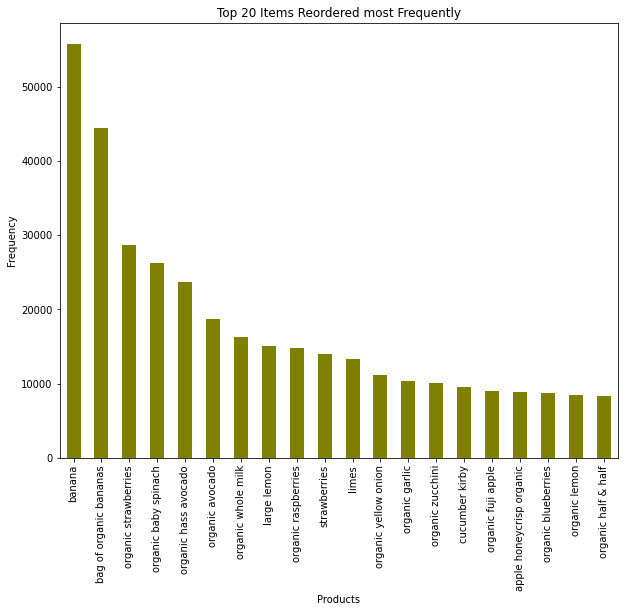

In [49]:
#with the merged dataframe, groupby the lowercase product names by how many orders each item has and sort by the total count
popular_products_y_first = products_merged_y_first.groupby(['product_id','product_names_lower'])['order_id'].count().reset_index(name='total_orders').sort_values(['total_orders'], ascending=False)

#create a bar graph of the results
popular_products_y_first[:20].plot(kind='bar',
                                   title='Top 20 Items Reordered most Frequently',
                                   x='product_names_lower',
                                   xlabel='Products',
                                   y='total_orders',
                                   ylabel='Frequency',
                                  figsize=[10,8],
                                  legend=None,
                                  color='olive')



plt.show()

Based on the results, most of the top ordered items were also the most reordered items

### [C3] For each product, what proportion of its orders are reorders?

In [50]:
#calculate the number of reorders for each product and assign to a variable
reorders = op.groupby('product_id')['reordered'].sum()

#calculate the total number of orders for each product and assign to a variable
total_orders = op.groupby('product_id').size()

#calculate the reorder proportion for each product and assign to a variable
reorder_proportion = reorders / total_orders

#convert this to a DataFrame for better readability and presentation
data_to_display = pd.DataFrame({
    'total_orders': total_orders,
    'reorders': reorders,
    'reorder_proportion': reorder_proportion
}).reset_index() #reset_index() will add the product_id to the dataframe as the first column.

#join with the products dataframe to get product names using an 'inner' join and pick the necessary columns needed to display
data_to_display = data_to_display.merge(pt, on='product_id', how='inner')[['product_id', 'product_name', 'total_orders', 'reorders', 'reorder_proportion']]

#display random values in the dataframe to test it worked
print(data_to_display.sort_values(by='reorder_proportion',ascending=False).sample(15))

       product_id                                       product_name  \
28294       30850                         French Roast Ground Coffee   
37403       40820  Vietnamese Brown Rice Noodle Soup Gluten Free ...   
14796       16189                       Chicken Flavor Instant Lunch   
40998       44743                                     Real Zero Cola   
24395       26586                Quart Sized  Easy Open Freezer Bags   
42509       46381                            Tricolor Pearl Couscous   
5768         6315            Reusable Hot & Cold Therapy Sports Pack   
16693       18240  Protein Kefir Nonfat Cultured Milk Smoothie Va...   
41976       45795  Super Puffs Spinach & Apple Fruit & Veggie Gra...   
21875       23846                   Lactose Free Chocolate Ice Cream   
43318       47259                                 Spaetzle Dumplings   
13557       14838             Decaf Green Tea with White Tea - 20 CT   
12473       13657                     Coleslaw Dressing Calorie 

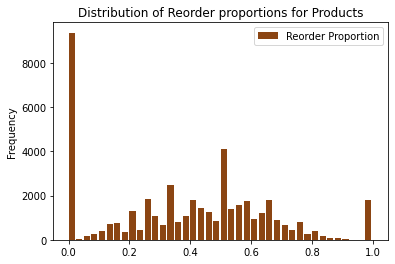

In [51]:
data_to_display['reorder_proportion'].plot(kind='hist',
                                 bins=40,
                                 title='Distribution of Reorder proportions for Products',
                                 ylabel='Frequency',
                                alpha=1,
                                color='saddlebrown',
                                width=.02
                                )

plt.legend(['Reorder Proportion'])
plt.show()

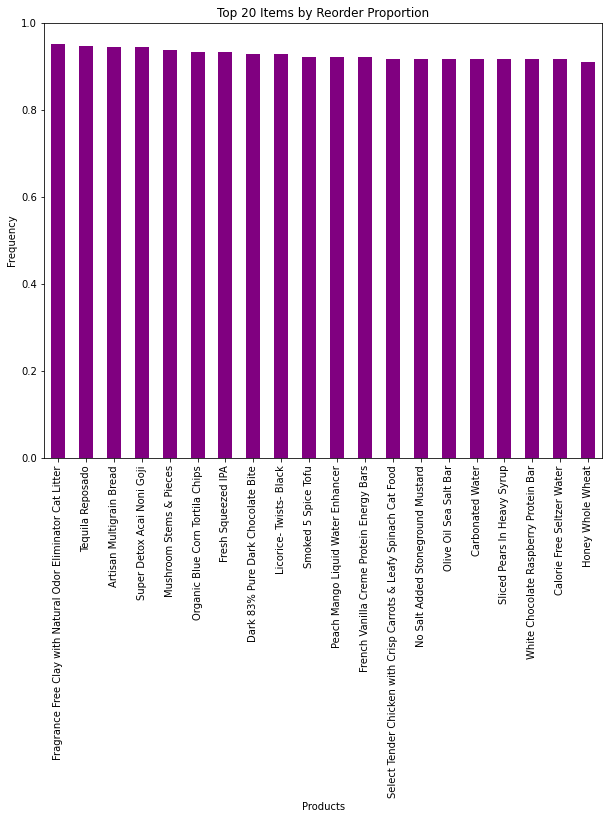

In [52]:
#create a bar graph of the top 20 reorder proportions
data_to_display.loc[data_to_display['reorder_proportion'] != 1.0].sort_values(by='reorder_proportion',ascending=False)[:20].plot(kind='bar',
                                   title='Top 20 Items by Reorder Proportion',
                                   x='product_name',
                                   xlabel='Products',
                                   y='reorder_proportion',
                                   ylabel='Frequency',
                                  figsize=[10,8],
                                  legend=None,
                                  color='purple')



plt.show()

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 

In [53]:
#merging products and order products dataframes so we can get how many time a product was ordered to determine popularity
products_merged_x = op.merge(pt,
                          how='left',
                          on='product_id')


#drop columns we don't need
products_merged_x = products_merged_x.drop(['reordered','aisle_id','department_id'],axis='columns')

#make a new dataframe containing only items that were the first added to their carts
products_merged_x_first = products_merged_x.loc[products_merged_x['add_to_cart_order']==1]



#make sure we have the values we need
products_merged_x_first.info(show_counts=True)
print(products_merged_x_first.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450046 entries, 1 to 4544999
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   order_id             450046 non-null  int64 
 1   product_id           450046 non-null  int64 
 2   add_to_cart_order    450046 non-null  int64 
 3   product_name         450046 non-null  object
 4   product_names_lower  450046 non-null  object
dtypes: int64(3), object(2)
memory usage: 20.6+ MB
         order_id  product_id  add_to_cart_order           product_name  \
4215365   2401460        5652                  1   Organic Red Potatoes   
3439201   1200475       19678                  1  Organic Russet Potato   
1306810    604586       19660                  1           Spring Water   
856416    2940205       39812                  1          Organic Thyme   
2790329   2515356        5482                  1   Strawberry Shortcake   
297138    1961716       30391         

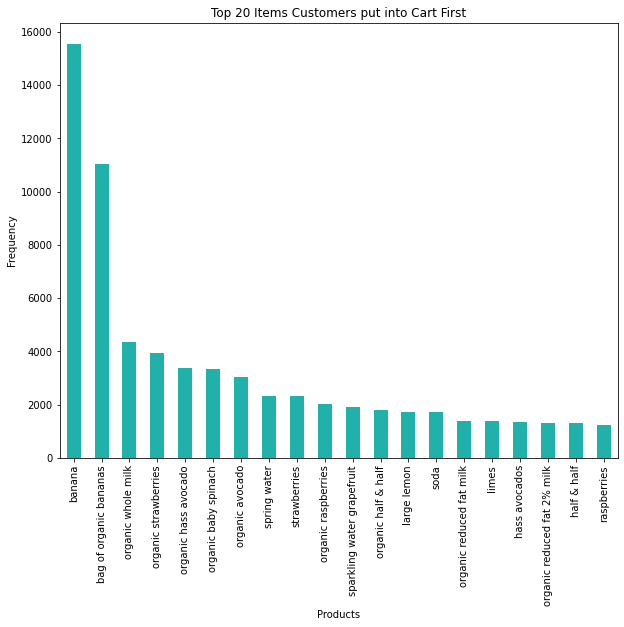

In [54]:
#with the merged dataframe, groupby the lowercase product names by how many orders each item has and sort by the total count
popular_products_x_first = products_merged_x_first.groupby(['product_id','product_names_lower'])['order_id'].count().reset_index(name='total_orders').sort_values(['total_orders'], ascending=False)


#create a bar graph of the results
popular_products_x_first[:20].plot(kind='bar',
                                   title='Top 20 Items Customers put into Cart First',
                                   x='product_names_lower',
                                   xlabel='Products',
                                   y='total_orders',
                                   ylabel='Frequency',
                                  figsize=[10,8],
                                  legend=None,
                                  color='lightseagreen')



plt.show()

Based on the results, they are similar to the top 20 overall products people order, but with more basic products like milk and water closer to the top. Bananas are the most common in both scenarios

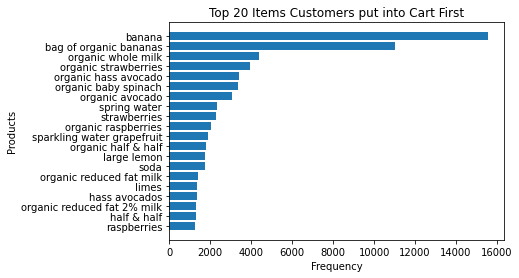

In [56]:
# Assuming popular_products_x_first['product_names_lower'] contains the product names and 'total_orders' contains the count
plt.barh(popular_products_x_first['product_names_lower'][:20], popular_products_x_first['total_orders'][:20])
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest values at the top
plt.xlabel('Frequency')
plt.ylabel('Products')
plt.title('Top 20 Items Customers put into Cart First')
plt.show()
